In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.utils.validation import check_is_fitted
import pandas as pd
import warnings
import matplotlib.pyplot as plt
from module.conf import PROJECT_DIR

warnings.simplefilter(action="ignore", category=FutureWarning)

In [37]:
def wragle(file_path) -> pd.DataFrame:
    df = pd.read_csv(filepath_or_buffer=file_path)
    mask_ba = df["place_with_parent_names"].str.contains("Capital Federal")
    mask_apt= df["property_type"] == "apartment"
    mask_price = df["price"] < 400_000
    df = df[mask_ba & mask_apt & mask_price]

    # remove the out-layer data
    low, high=df["surface_covered_in_m2"].quantile(q=(0.1,0.9,))
    mask_area = df["surface_covered_in_m2"].between(left=low, right=high)
    df = df[mask_area]
    return df

In [38]:
df = wragle("".join([PROJECT_DIR, "/data/csv/data/buenos-aires-real-estate-1.csv"]))
df.head(n=10)

,operation,property_type,place_with_parent_names,lat-lon,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url
4,sell,apartment,|Argentina|Capital Federal|Chacarita|,"-34.5846508988,-58.4546932614",129000.0,USD,1955949.6,129000.0,76.0,70.0,1697.368421,1842.857143,NaN,NaN,NaN,http://chacarita.properati.com.ar/10qlv_venta_...
9,sell,apartment,|Argentina|Capital Federal|Villa Luro|,"-34.6389789,-58.500115",87000.0,USD,1319128.8,87000.0,48.0,42.0,1812.500000,2071.428571,NaN,NaN,NaN,http://villa-luro.properati.com.ar/12m82_venta...
29,sell,apartment,|Argentina|Capital Federal|Caballito|,"-34.615847,-58.459957",118000.0,USD,1789163.2,118000.0,NaN,54.0,NaN,2185.185185,NaN,2.0,NaN,http://caballito.properati.com.ar/11wqh_venta_...
40,sell,apartment,|Argentina|Capital Federal|Constitución|,"-34.6252219,-58.3823825",57000.0,USD,864256.8,57000.0,42.0,42.0,1357.142857,1357.142857,5.0,2.0,364,http://constitucion.properati.com.ar/k2f0_vent...
41,sell,apartment,|Argentina|Capital Federal|Once|,"-34.6106102,-58.4125107",90000.0,USD,1364616.0,90000.0,57.0,50.0,1578.947368,1800.000000,NaN,3.0,450,http://once.properati.com.ar/suwa_venta_depart...
48,sell,apartment,|Argentina|Capital Federal|Almagro|,"-34.6038236,-58.4272911",138000.0,USD,2092411.2,138000.0,74.0,74.0,1864.864865,1864.864865,1.0,3.0,300,http://almagro.properati.com.ar/11w6t_venta_de...
58,sell,apartment,|Argentina|Capital Federal|Palermo|,"-34.586103,-58.423963",114000.0,USD,1728513.6,114000.0,NaN,32.0,NaN,3562.500000,NaN,2.0,NaN,http://palermo.properati.com.ar/11vtx_venta_de...
62,sell,apartment,|Argentina|Capital Federal|Flores|,"-34.6265182557,-58.4724630529",82000.0,USD,1243316.8,82000.0,50.0,50.0,1640.000000,1640.000000,NaN,2.0,NaN,http://flores.properati.com.ar/12w4k_venta_dep...
70,sell,apartment,|Argentina|Capital Federal|Belgrano|,"-34.5620844,-58.4566864",166000.0,USD,2516958.4,166000.0,58.0,52.0,2862.068966,3192.307692,NaN,2.0,NaN,http://belgrano.properati.com.ar/12tu6_venta_d...
72,sell,apartment,|Argentina|Capital Federal|Liniers|,"-34.648143,-58.524277",136500.0,USD,2069667.6,136500.0,NaN,71.0,NaN,1922.535211,NaN,3.0,NaN,http://liniers.properati.com.ar/11xwz_venta_de...


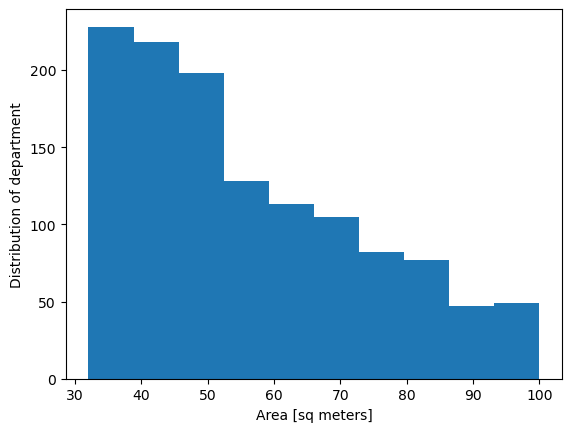

In [39]:
plt.hist(x=df["surface_covered_in_m2"])
plt.xlabel("Area [sq meters]")
plt.ylabel("Distribution of department")
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1245 entries, 4 to 8604
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   operation                   1245 non-null   object 
 1   property_type               1245 non-null   object 
 2   place_with_parent_names     1245 non-null   object 
 3   lat-lon                     1206 non-null   object 
 4   price                       1245 non-null   float64
 5   currency                    1245 non-null   object 
 6   price_aprox_local_currency  1245 non-null   float64
 7   price_aprox_usd             1245 non-null   float64
 8   surface_total_in_m2         885 non-null    float64
 9   surface_covered_in_m2       1245 non-null   float64
 10  price_usd_per_m2            854 non-null    float64
 11  price_per_m2                1245 non-null   float64
 12  floor                       354 non-null    float64
 13  rooms                       1006 

In [41]:
df.describe()

,price,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms
count,1245.000000,1.245000e+03,1245.000000,885.000000,1245.000000,854.000000,1245.000000,354.000000,1006.000000
mean,137887.641767,2.090708e+06,137887.641767,61.463277,56.142169,2251.124854,2481.730904,11.525424,2.422465
std,59512.840447,9.023575e+05,59512.840447,26.561507,17.994502,654.382132,745.598017,51.846206,0.882924
min,37983.000000,5.759134e+05,37983.000000,0.000000,32.000000,513.513514,808.148936,1.000000,1.000000
25%,93000.000000,1.410103e+06,93000.000000,44.000000,42.000000,1814.350649,1940.000000,2.000000,2.000000
50%,125000.000000,1.895300e+06,125000.000000,57.000000,51.000000,2132.352941,2369.340426,4.000000,2.000000
75%,165000.000000,2.501796e+06,165000.000000,76.000000,70.000000,2600.000000,2857.142857,7.000000,3.000000
max,395000.000000,5.989148e+06,395000.000000,229.000000,100.000000,5777.777778,6810.344828,616.000000,6.000000


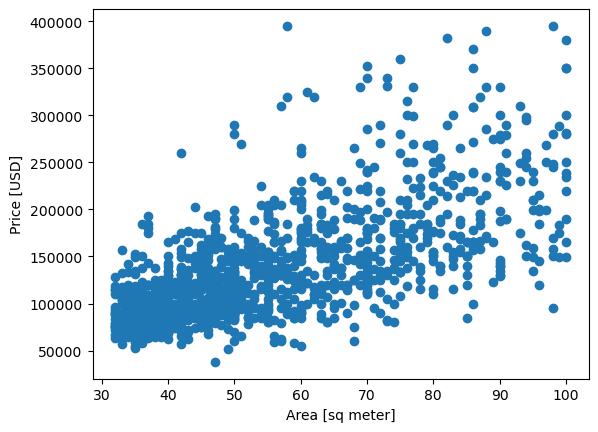

In [42]:
plt.scatter(x=df["surface_covered_in_m2"], y=df["price_aprox_usd"])
plt.xlabel("Area [sq meter]")
plt.ylabel("Price [USD]")
plt.show()

In [43]:
features = ["surface_covered_in_m2"]
X_train = df[features]

In [44]:
target = ["price_aprox_usd"]
Y_train = df[target]

In [45]:
y_mean = Y_train.mean()

In [67]:
y_baseline = [y_mean] * len(Y_train)

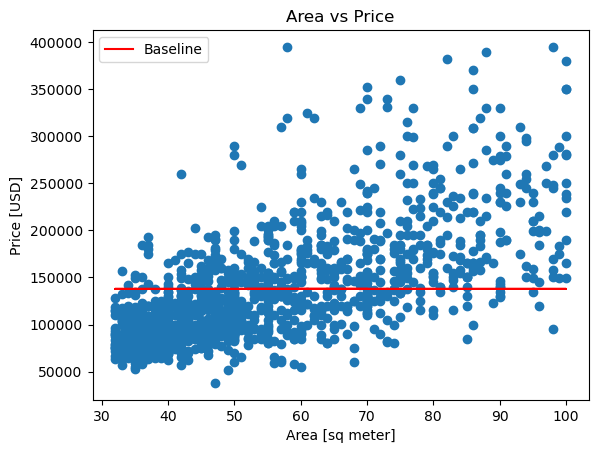

In [68]:
plt.plot(X_train["surface_covered_in_m2"], y_baseline, color="r", label="Baseline")
plt.scatter(x=X_train, y=Y_train)
plt.xlabel("Area [sq meter]")
plt.ylabel("Price [USD]")
plt.title("Area vs Price")
plt.legend()
plt.show()

In [52]:
mae_baseline = mean_absolute_error(Y_train, y_baseline)
mae_baseline

45175.60536636505

# Create model

In [54]:
model = LinearRegression()

1. train model

In [55]:
model.fit(X=X_train, y=Y_train)

LinearRegression()

In [56]:
check_is_fitted(model)

2. evaluate

In [59]:
y_pred_training = model.predict(X_train)

In [60]:
mea_train = mean_absolute_error(Y_train, y_pred_training)

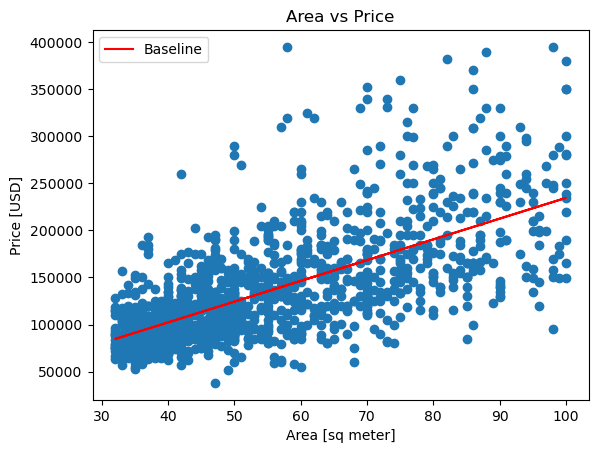

In [63]:
plt.plot(X_train["surface_covered_in_m2"], y_pred_training, color="r", label="Baseline")
plt.scatter(x=X_train, y=Y_train)
plt.xlabel("Area [sq meter]")
plt.ylabel("Price [USD]")
plt.title("Area vs Price")
plt.legend()
plt.show()

In [65]:
coefficient = model.coef_
intercept  = model.intercept_

In [66]:
print(f"{92 * coefficient + intercept}")

[[216962.13166568]]
